# Classification

In [7]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.linear_model as sklm
import sklearn.metrics as skm

#change defaults for plotting
#set line width
plt.rcParams['lines.linewidth'] = 4
#set font size for titles 
plt.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
plt.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
plt.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
plt.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
plt.rcParams['legend.numpoints'] = 1
#set parameters for saving figures
plt.rcParams['savefig.dpi'] = 1000
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0

In [8]:
# # Figure 26-4 on page 590
def accuracy(true_pos, false_pos, true_neg, false_neg):
    numerator = true_pos + true_neg
    denominator = true_pos + true_neg + false_pos + false_neg
    return numerator/denominator

def sensitivity(true_pos, false_neg):
    try:
        return true_pos/(true_pos + false_neg)
    except ZeroDivisionError:
        return float('nan')
    
def specificity(true_neg, false_pos):
    try:
        return true_neg/(true_neg + false_pos)
    except ZeroDivisionError:
        return float('nan')
    
def pos_pred_val(true_pos, false_pos):
    try:
        return true_pos/(true_pos + false_pos)
    except ZeroDivisionError:
        return float('nan')
    
def neg_pred_val(true_neg, false_neg):
    try:
        return true_neg/(true_neg + false_neg)
    except ZeroDivisionError:
        return float('nan')
       
def get_stats(true_pos, false_pos, true_neg, false_neg,
              toPrint = True):
    accur = accuracy(true_pos, false_pos, true_neg, false_neg)
    sens = sensitivity(true_pos, false_neg)
    spec = specificity(true_neg, false_pos)
    ppv = pos_pred_val(true_pos, false_pos)
    if toPrint:
        print(' Accuracy =', round(accur, 3))
        print(' Sensitivity =', round(sens, 3))
        print(' Specificity =', round(spec, 3))
        print(' Pos. Pred. Val. =', round(ppv, 3))
    return (accur, sens, spec, ppv)

In [9]:
# # Figure 26-6 on page 592
class Runner(object):
    def __init__(self, name, gender, age, time):
        self._name = name
        self._feature_vec = np.array([age, time])
        self._label = gender
    
    def feature_dist(self, other):
        return ((self._feature_vec-other._feature_vec)**2).sum()**0.5

    def get_time(self):
        return self._feature_vec[1]
    
    def get_age(self):
        return self._feature_vec[0]
    
    def get_label(self):
        return self._label
    
    def get_features(self):
        return self._feature_vec

    def __str__(self):
        return (f'{self._name}: {self.get_age()}, ' +
                f'{self.get_time()}, {self._label}')   

In [10]:
def build_marathon_examples(file_name):
    df = pd.read_csv(file_name)
    examples = []
    for index, row in df.iterrows():
        a = Runner(row['Name'],row['Gender'],row['Age'],row['Time'])
        examples.append(a)
    return examples

def divide_80_20(examples):
    sample_indices = random.sample(range(len(examples)),
                                  len(examples)//5)
    training_set, test_set = [], []
    for i in range(len(examples)):
        if i in sample_indices:
            test_set.append(examples[i])
        else:
            training_set.append(examples[i])
    return training_set, test_set

In [11]:
# # Figure 26-7 on page 594
def find_k_nearest(example, example_set, k):
    k_nearest, distances = [], []
    # Build lists containing first k examples and their distances
    for i in range(k):
        k_nearest.append(example_set[i])
        distances.append(example.feature_dist(example_set[i]))
    max_dist = max(distances) #Get maximum distance
    # Look at examples not yet considered
    for e in example_set[k:]:
        dist = example.feature_dist(e)
        if dist < max_dist:
            #replace farther neighbor by this one
            max_index = distances.index(max_dist)
            k_nearest[max_index] = e
            distances[max_index] = dist
            max_dist = max(distances)      
    return k_nearest, distances
    
def k_nearest_classify(training_set, test_set, label, k):
    """Assumes training_set & test_set lists of examples, k an int
       Uses a k-nearest neighbor classifier to predict
         whether each example in test_set has the given label
       Returns number of true positives, false positives,
          true negatives, and false negatives"""
    true_pos, false_pos, true_neg, false_neg = 0, 0, 0, 0
    for e in test_set:
        print('Classifying', e)
        nearest, distances = find_k_nearest(e, training_set, k)
        # conduct vote
        num_match = 0
        for i in range(len(nearest)):
            if nearest[i].get_label() == label:
                num_match += 1
        if num_match > k//2: # guess label
            if e.get_label() == label:
                true_pos += 1
            else:
                false_pos += 1
        else: # guess not label
            if e.get_label() != label:
                true_neg += 1
            else:
                false_neg += 1
    return true_pos, false_pos, true_neg, false_neg

In [12]:
# Code on page 595
# Warning: this takes a very long time to run
random.seed(0)
examples = build_marathon_examples('bm_results2012.csv')
training, test_set = divide_80_20(examples)   
true_pos, false_pos, true_neg, false_neg =\
        k_nearest_classify(training, test_set, 'M', 9)
get_stats(true_pos, false_pos, true_neg, false_neg)

Classifying Cherop Sharon: 28.0, 151.83, F
Classifying Dado Firehiwot: 28.0, 154.93, F
Classifying Korir Wesley: 29.0, 132.67, M
Classifying Kipyego Bernard: 25.0, 133.22, M
Classifying Kisorio Mathew: 22.0, 138.25, M
Classifying Sumgong Jemima Jelagat: 27.0, 151.87, F
Classifying Leonteva Nadezdha: 27.0, 160.67, F
Classifying Greenless Tommy: 29.0, 154.13, M
Classifying Miller Shannon M.: 27.0, 175.78, F
Classifying Dionne Hilary K.: 26.0, 171.93, F
Classifying Ray Autumn J.: 32.0, 181.68, F
Classifying Manning Matthew T.: 32.0, 154.9, M
Classifying Warick Jason J.: 38.0, 158.13, M
Classifying Croft Sheila S.: 37.0, 168.52, F
Classifying Mindel Scott: 25.0, 147.25, M
Classifying Tamura Hideaki: 23.0, 138.25, M
Classifying Martin Brendan: 23.0, 142.53, M
Classifying Oishi Ken: 23.0, 155.9, M
Classifying Tenorio Franklin B. Sr.: 42.0, 144.07, M
Classifying Bardeesy Rami: 43.0, 166.97, M
Classifying Piers Sheri L.: 40.0, 161.92, F
Classifying Rodriguez Benny: 35.0, 170.8, M
Classifying A

(0.6497214484679665, 0.7152182782537739, 0.563274098007539, 0.6836973478939158)

In [13]:
# # Figure 26-8 on page 596
def prevalence_classify(training_set, test_set, label):
    """Assumes training_set & test_set lists of examples
       Uses a prevalence-based classifier to predict
         whether each example in test_set is of class label
       Returns number of true positives, false positives,
          true negatives, and false negatives"""
    num_with_label = 0
    for e in training_set:
        if e.get_label()== label:
            num_with_label += 1
    prob_label = num_with_label/len(training_set)
    true_pos, false_pos, true_neg, false_neg = 0, 0, 0, 0
    for e in test_set:
        if random.random() < prob_label: #guess label
            if e.get_label() == label:
                true_pos += 1
            else:
                false_pos += 1
        else: #guess not label
            if e.get_label() != label:
                true_neg += 1
            else:
                false_neg += 1
    return true_pos, false_pos, true_neg, false_neg

In [14]:
random.seed(0)
examples = build_marathon_examples('bm_results2012.csv')
training, test_set = divide_80_20(examples) 
true_pos, false_pos, true_neg, false_neg =\
        prevalence_classify(training, test_set, 'M')
get_stats(true_pos, false_pos, true_neg, false_neg)


 Accuracy = 0.514
 Sensitivity = 0.593
 Specificity = 0.41
 Pos. Pred. Val. = 0.57


(0.5141597028783659,
 0.5928192574459404,
 0.41033925686591277,
 0.5702511773940345)

In [15]:
# Code on page 597
random.seed(0)
examples = build_marathon_examples('bm_results2012.csv')
training, test_set = divide_80_20(examples)   
reduced_training = random.sample(training, len(training)//10)
true_pos, false_pos, true_neg, false_neg =\
        k_nearest_classify(reduced_training, test_set, 'M', 9)
get_stats(true_pos, false_pos, true_neg, false_neg)

Classifying Cherop Sharon: 28.0, 151.83, F
Classifying Dado Firehiwot: 28.0, 154.93, F
Classifying Korir Wesley: 29.0, 132.67, M
Classifying Kipyego Bernard: 25.0, 133.22, M
Classifying Kisorio Mathew: 22.0, 138.25, M
Classifying Sumgong Jemima Jelagat: 27.0, 151.87, F
Classifying Leonteva Nadezdha: 27.0, 160.67, F
Classifying Greenless Tommy: 29.0, 154.13, M
Classifying Miller Shannon M.: 27.0, 175.78, F
Classifying Dionne Hilary K.: 26.0, 171.93, F
Classifying Ray Autumn J.: 32.0, 181.68, F
Classifying Manning Matthew T.: 32.0, 154.9, M
Classifying Warick Jason J.: 38.0, 158.13, M
Classifying Croft Sheila S.: 37.0, 168.52, F
Classifying Mindel Scott: 25.0, 147.25, M
Classifying Tamura Hideaki: 23.0, 138.25, M
Classifying Martin Brendan: 23.0, 142.53, M
Classifying Oishi Ken: 23.0, 155.9, M
Classifying Tenorio Franklin B. Sr.: 42.0, 144.07, M
Classifying Bardeesy Rami: 43.0, 166.97, M
Classifying Piers Sheri L.: 40.0, 161.92, F
Classifying Rodriguez Benny: 35.0, 170.8, M
Classifying A

(0.6376508820798514,
 0.6666666666666666,
 0.5993537964458805,
 0.6871320437342304)

In [16]:
# # Figure 26-9 on page 598
def find_k(training_set, min_k, max_k, num_folds, label):
    # Find average accuracy for range of odd values of k
    accuracies = []
    for k in range(min_k, max_k + 1, 2):
        score = 0.0
        for i in range(num_folds):
            # downsample to reduce computation time
            fold = random.sample(training_set,
                                 min(5000, len(training_set)))
            examples, test_set = divide_80_20(fold)
            true_pos, false_pos, true_neg, false_neg =\
                k_nearest_classify(examples, test_set, label, k)
            score += accuracy(true_pos, false_pos, true_neg, false_neg)
        accuracies.append(score/num_folds)
    plt.plot(range(min_k, max_k + 1, 2), accuracies)
    plt.title('Average Accuracy vs k (' + str(num_folds)\
                + ' folds)')
    plt.xlabel('k')
    plt.ylabel('Accuracy')

Classifying Berlin Daniel: 41.0, 238.0, M
Classifying Conley Emma: 25.0, 248.43, F
Classifying Uffelman Louise: 48.0, 261.8, F
Classifying Wasson Dewain: 50.0, 270.0, M
Classifying Minihan Page A.: 28.0, 306.37, F
Classifying Sherman Michelle L: 46.0, 247.5, F
Classifying Moiseff Bianca: 23.0, 217.85, F
Classifying Fransen Brian: 26.0, 235.35, M
Classifying Cheshire James W.: 61.0, 267.17, M
Classifying Stafford Dan: 37.0, 222.8, M
Classifying Jacobson Daniel B.: 45.0, 287.05, M
Classifying Atnip Misty D: 36.0, 247.23, F
Classifying Luce John C.: 29.0, 307.37, M
Classifying Sarbadhikari Probir K.: 44.0, 230.68, M
Classifying Higgins Connor: 21.0, 201.03, M
Classifying Warren Sue H.: 49.0, 291.47, F
Classifying Spitler Mann III: 63.0, 301.98, M
Classifying Strano Maryanne: 59.0, 286.88, F
Classifying Hom Melani: 27.0, 256.0, F
Classifying Kaufman Patricia: 47.0, 259.45, F
Classifying Logsdon Cory M.: 24.0, 167.33, M
Classifying Lombardo Chiara: 39.0, 210.08, F
Classifying Zack Tammy L.:

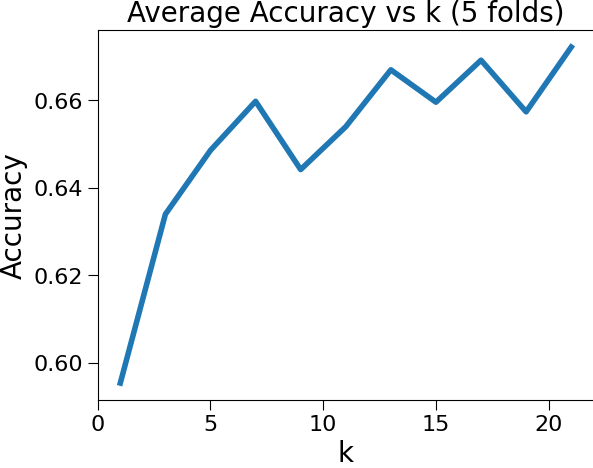

In [17]:
# Warning, this takes a hideously long time to run
random.seed(0)
examples = build_marathon_examples('bm_results2012.csv')
training, test_set = divide_80_20(examples)
find_k(training, 1, 21, 5, 'M')

In [18]:
# Code assumed already run on page 600
random.seed(0)
examples = build_marathon_examples('bm_results2012.csv')
training, test_set = divide_80_20(examples)

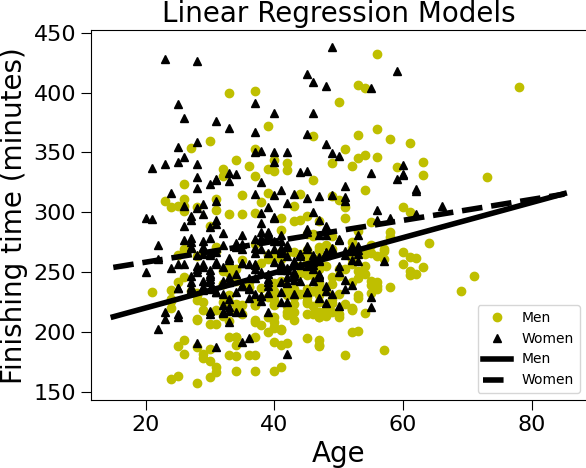

In [19]:
# Figure 26-12 on page 600
# Build training sets for men and women
age_m, age_w, time_m, time_w = [], [], [], []
for e in training:
    if e.get_label() == 'M':
        age_m.append(e.get_age())
        time_m.append(e.get_time())
    else:
        age_w.append(e.get_age())
        time_w.append(e.get_time())
# downsample to make plot of examples readable
ages, times = [], []
for i in random.sample(range(len(age_m)), 300):
    ages.append(age_m[i])
    times.append(time_m[i])
# Produce scatter plot of examples
plt.plot(ages, times, 'yo', markersize = 6, label = 'Men')
ages, times = [], []
for i in random.sample(range(len(age_w)), 300):
    ages.append(age_w[i])
    times.append(time_w[i])
plt.plot(ages, times, 'k^', markersize = 6, label = 'Women')
# Learn two first-degree linear regression models
m_model = np.polyfit(age_m, time_m, 1)
f_model = np.polyfit(age_w, time_w, 1)
#Plot lines corresponding to models
xmin, xmax = 15, 85
plt.plot((xmin, xmax), (np.polyval(m_model,(xmin, xmax))),
          'k', label = 'Men')
plt.plot((xmin, xmax), (np.polyval(f_model,(xmin, xmax))),
          'k--', label = 'Women')
plt.title('Linear Regression Models')
plt.xlabel('Age')
plt.ylabel('Finishing time (minutes)')
plt.legend()

In [20]:
# Figure 26-13 on page 601
true_pos, false_pos, true_neg, false_neg = 0, 0, 0, 0
for e in test_set:
    age = e.get_age()
    time = e.get_time()
    if (abs(time - np.polyval(m_model,age)) <
      abs(time - np.polyval(f_model, age))):
        if e.get_label() == 'M':
            true_pos += 1
        else:
            false_pos += 1
    else:
        if e.get_label() == 'F':
            true_neg += 1
        else:
            false_neg += 1
get_stats(true_pos, false_pos, true_neg, false_neg)

 Accuracy = 0.614
 Sensitivity = 0.684
 Specificity = 0.523
 Pos. Pred. Val. = 0.654


(0.6144382544103992,
 0.6838025295797634,
 0.5228863758750674,
 0.6541764246682279)

In [21]:
random.seed(0)

# Figure 26-14 on page 604
feature_vecs, labels = [], []
for i in range(25000): # create 4 examples in each iteration
    feature_vecs.append([random.gauss(0, 0.5), random.gauss(0, 0.5),
                        random.random()])
    labels.append('A')
    feature_vecs.append([random.gauss(0, 0.5), random.gauss(2, 0.),
                        random.random()])
    labels.append('B')
    feature_vecs.append([random.gauss(2, 0.5), random.gauss(0, 0.5),
                        random.random()])
    labels.append('C')
    feature_vecs.append([random.gauss(2, 0.5), random.gauss(2, 0.5),
                        random.random()])
    labels.append('D')
    
model = sklm.LogisticRegression().fit(feature_vecs, labels)
print('model.classes_ =', model.classes_)

for i in range(len(model.coef_)):
    print('For label', model.classes_[i],
          'feature weights =', model.coef_[i].round(4))
    
print('[0, 0] probs =', model.predict_proba([[0, 0, 1]])[0].round(4))
print('[0, 2] probs =', model.predict_proba([[0, 2, 2]])[0].round(4))
print('[2, 0] probs =', model.predict_proba([[2, 0, 3]])[0].round(4))
print('[2, 2] probs =', model.predict_proba([[2, 2, 4]])[0].round(4))

model.classes_ = ['A' 'B' 'C' 'D']
For label A feature weights = [-4.7229 -4.3618  0.0595]
For label B feature weights = [-3.3346  4.7875  0.0149]
For label C feature weights = [ 3.7026 -4.4966 -0.0176]
For label D feature weights = [ 4.3548  4.0709 -0.0568]
[0, 0] probs = [9.998e-01 0.000e+00 2.000e-04 0.000e+00]
[0, 2] probs = [2.60e-03 9.97e-01 0.00e+00 4.00e-04]
[2, 0] probs = [3.000e-04 0.000e+00 9.996e-01 2.000e-04]
[2, 2] probs = [0.000e+00 5.000e-04 2.000e-04 9.992e-01]


In [22]:
random.seed(0)

# Figure 26-15 on page 606
feature_vecs, labels = [], []
for i in range(20000):
    feature_vecs.append([random.gauss(0, 0.5), random.gauss(0, 0.5)])
    labels.append('A')
    feature_vecs.append([random.gauss(2, 0.5), random.gauss(2, 0.5)])
    labels.append('D')
    
model = sklm.LogisticRegression().fit(feature_vecs, labels)
print('model.coef =', model.coef_.round(4))
print('[0, 0] probs =', model.predict_proba([[0, 0]])[0].round(4))
print('[0, 2] probs =', model.predict_proba([[0, 2]])[0].round(4))
print('[2, 0] probs =', model.predict_proba([[2, 0]])[0].round(4))
print('[2, 2] probs =', model.predict_proba([[2, 2]])[0].round(4))

model.coef = [[6.7081 6.5737]]
[0, 0] probs = [1. 0.]
[0, 2] probs = [0.5354 0.4646]
[2, 0] probs = [0.4683 0.5317]
[2, 2] probs = [0. 1.]


In [23]:
# # Figure 26-16 on page 609
def apply_model(model, test_set, label, prob = 0.5):
    # Create vector containing feature vectors for all test examples
    test_feature_vecs = [e.get_features() for e in test_set]
    probs = model.predict_proba(test_feature_vecs)
    true_pos, false_pos, true_neg, false_neg = 0, 0, 0, 0
    for i in range(len(probs)):
        if probs[i][1] > prob:
            if test_set[i].get_label() == label:
                true_pos += 1
            else:
                false_pos += 1
        else:
            if test_set[i].get_label() != label:
                true_neg += 1
            else:
                false_neg += 1
    return true_pos, false_pos, true_neg, false_neg

In [24]:
random.seed(0)
    
examples = build_marathon_examples('bm_results2012.csv')
training, test = divide_80_20(examples)

feature_vecs, labels = [], []
for e in training:
    feature_vecs.append([e.get_age(), e.get_time()])
    labels.append(e.get_label())
model = sklm.LogisticRegression().fit(feature_vecs,labels)
print('Feature weights for label M:',
      'age =', str(round(model.coef_[0][0], 3)) + ',',
      'time =', round(model.coef_[0][1], 3))
true_pos, false_pos, true_neg, false_neg = \
                      apply_model(model, test, 'M', 0.5)
get_stats(true_pos, false_pos, true_neg, false_neg)

Feature weights for label M: age = 0.055, time = -0.011
 Accuracy = 0.636
 Sensitivity = 0.831
 Specificity = 0.377
 Pos. Pred. Val. = 0.638


(0.6355617455896008,
 0.8310893512851897,
 0.3774905761981691,
 0.6379580331976198)

In [25]:
# # Figure 26-17 on page 611
def build_ROC(model, test_set, label, title, plot = True):
    xVals, yVals = [], []
    for p in np.arange(0, 1, 0.01):
        true_pos, false_pos, true_neg, false_neg =\
                             apply_model(model, test_set, label, p)
        xVals.append(1.0 - specificity(true_neg, false_pos))
        yVals.append(sensitivity(true_pos, false_neg))
    auroc = skm.auc(xVals, yVals)
    if plot:
        plt.plot(xVals, yVals)
        plt.plot([0,1], [0,1,], '--')
        plt.title(title +  ' (AUROC = ' +
                  str(round(auroc, 3)) + ')')
        plt.xlabel('1 - Specificity')
        plt.ylabel('Sensitivity')
    return auroc

0.7019385008086333

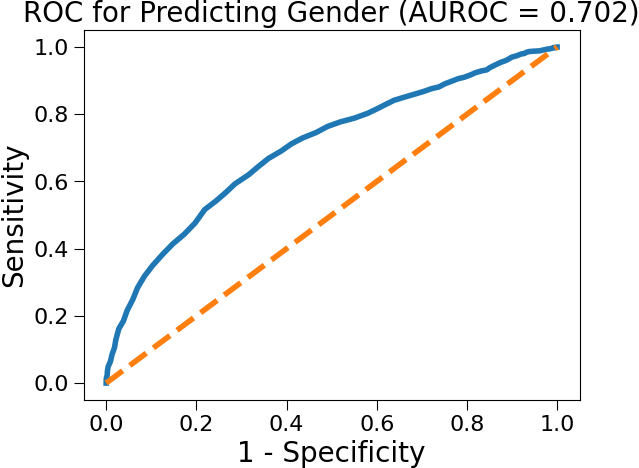

In [26]:
build_ROC(model, test, 'M', 'ROC for Predicting Gender')

In [27]:
# Code on page 612
manifest = pd.read_csv('TitanicPassengers.csv')
print(manifest.corr().round(2))

          Class   Age  Survived
Class      1.00 -0.41     -0.32
Age       -0.41  1.00     -0.06
Survived  -0.32 -0.06      1.00


C:\Users\zfreitas\AppData\Local\Temp\ipykernel_26500\540796557.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(manifest.corr().round(2))


In [28]:
# Code on page 613
manifest = pd.read_csv('TitanicPassengers.csv')
manifest['Gender'] = (manifest['Gender'].
                      apply(lambda g: 1 if g == 'M' else 0))
print(manifest.corr().round(2))

          Class   Age  Gender  Survived
Class      1.00 -0.41    0.14     -0.32
Age       -0.41  1.00    0.06     -0.06
Gender     0.14  0.06    1.00     -0.54
Survived  -0.32 -0.06   -0.54      1.00


C:\Users\zfreitas\AppData\Local\Temp\ipykernel_26500\438773548.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(manifest.corr().round(2))


In [29]:
# # Function defintion from earlier chapters
def minkowski_dist(v1, v2, p):
    """Assumes v1 and v2 are equal-length arrays of numbers
       Returns minkowski distance of order p between v1 and v2"""
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

# # Figure 26-19 on page 615
class Passenger(object):
    features = ('1st Class', '2nd Class', '3rd Class',
                'age', 'male')
    def __init__(self, pClass, age, gender, survived, name):
        self._name = name
        self._feature_vec = [0, 0, 0, age, gender]
        self._feature_vec[pClass - 1] = 1
        self._label = survived
        self.cabinClass = pClass
    def distance(self, other):
        return minkowski_dist(self.veatureVec, other._feature_vec, 2)
    def get_class(self):
        return self.cabinClass
    def get_age(self):
        return self._feature_vec[3]
    def get_gender(self):
        return self._feature_vec[4]
    def get_name(self):
        return self._name
    def get_features(self):
        return self._feature_vec[:]
    def get_label(self):
        return self._label

In [30]:
# # Figure 26-20 on page 615                  
def build_Titanic_examples():
    manifest = pd.read_csv('TitanicPassengers.csv')
    examples = []
    for index, row in manifest.iterrows():
        p = Passenger(row['Class'], row['Age'],
                      1 if row['Gender'] == 'M' else 0,
                      row['Survived'],
                      row['Last Name'] + row['Other Names'])
        examples.append(p)
    return examples

In [31]:
# # Figure 26-21 on page 616
def test_models(examples, num_trials, print_stats, print_weights):
    stats, weights = [], [[], [], [], [], []]
    for i in range(num_trials):
        training, test_set = divide_80_20(examples)
        xVals, yVals = [], []
        for e in training:
            xVals.append(e.get_features())
            yVals.append(e.get_label())
        xVals = np.array(xVals)
        yVals = np.array(yVals)
        model = sklm.LogisticRegression().fit(xVals, yVals)
        for i in range(len(Passenger.features)):
            weights[i].append(model.coef_[0][i])
        true_pos, false_pos, true_neg, false_neg =\
                         apply_model(model, test_set, 1, 0.5)
        auroc = build_ROC(model, test_set, 1, None, False)
        tmp = get_stats(true_pos, false_pos, true_neg, false_neg, False)
        stats.append(tmp + (auroc,))
    print('Averages for', num_trials, 'trials')
    if print_weights:
        for feature in range(len(weights)):
            feature_mean = round(sum(weights[feature])/num_trials, 3)
            feature_std = np.std(weights[feature])
            print(' Mean weight', Passenger.features[feature],
              '=', str(feature_mean) + ', 95% conf. int. =',
              round(feature_mean - 1.96*feature_std, 3), 'to',
              round(feature_mean + 1.96*feature_std, 3))
    if print_stats:
        summarize_stats(stats)

In [32]:
# # Figure 26-22 on page 617
def summarize_stats(stats):
    """assumes stats a list of 5 floats: accuracy, sensitivity,
       specificity, pos. pred. val, ROC"""
    def print_stat(X, name):
        mean = round(sum(X)/len(X), 3)
        std = np.std(X)
        print(' Mean', name, '=', str(mean) + ',',
               '95% conf. int. =',
               round(mean - 1.96*std, 3), 'to',
               round(mean + 1.96*std, 3))
    accs, sens, specs, ppvs, aurocs = [], [], [], [], []
    for stat in stats:
        accs.append(stat[0])
        sens.append(stat[1])
        specs.append(stat[2])
        ppvs.append(stat[3])
        aurocs.append(stat[4])
    print_stat(accs, 'accuracy')
    print_stat(sens, 'sensitivity')
    print_stat(accs, 'specificity')
    print_stat(sens, 'pos. pred. val.')
    print_stat(aurocs, 'AUROC')

In [33]:
# # Code from page 617
random.seed(0)
test_models(build_Titanic_examples(), 100, True, False)

Averages for 100 trials
 Mean accuracy = 0.783, 95% conf. int. = 0.736 to 0.83
 Mean sensitivity = 0.702, 95% conf. int. = 0.603 to 0.801
 Mean specificity = 0.783, 95% conf. int. = 0.736 to 0.83
 Mean pos. pred. val. = 0.702, 95% conf. int. = 0.603 to 0.801
 Mean AUROC = 0.839, 95% conf. int. = 0.789 to 0.889


In [34]:
test_models(build_Titanic_examples(), 100, False, True) 

Averages for 100 trials
 Mean weight 1st Class = 1.144, 95% conf. int. = 1.026 to 1.262
 Mean weight 2nd Class = -0.088, 95% conf. int. = -0.185 to 0.009
 Mean weight 3rd Class = -1.057, 95% conf. int. = -1.174 to -0.94
 Mean weight age = -0.033, 95% conf. int. = -0.04 to -0.026
 Mean weight male = -2.401, 95% conf. int. = -2.549 to -2.253
